In [ ]:
!pip install neupy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
A = np.array([
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,1,-1,1,-1,-1,
    -1,-1,1,-1,1,-1,-1,
    -1,1,1,1,1,1,-1,
    -1,1,-1,-1,-1,1,-1,
    -1,1,-1,-1,-1,1,-1,
    1,1,1,-1,1,1,1,
])

B = np.array([
    1,1,1,1,1,1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,1,-1,
    1,-1,-1,-1,1,-1,-1,
    1,1,1,1,-1,-1,-1,
    1,-1,-1,-1,1,-1,-1,
    1,-1,-1,-1,-1,1,-1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
])


C = np.array([
    -1,-1,1,1,1,1,-1,
    -1,1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,-1,
    1,-1,-1,-1,-1,-1,-1,
    1,-1,-1,-1,-1,-1,-1,
    1,-1,-1,-1,-1,-1,-1,
    1,-1,-1,-1,-1,-1,-1,
    -1,1,-1,-1,-1,-1,1,
    -1,-1,1,1,1,1,-1,
])

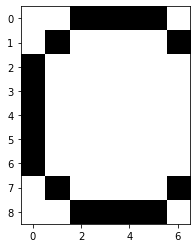

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(C.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.show()

In [ ]:
small_A = np.array([
    -1,1,-1,
    1,-1,1,
    1,1,1,
    1,-1,1,
    1,-1,1,
])

small_B = np.array([
    1,1,-1,
    1,-1,1,
    1,1,-1,
    1,-1,1,
    1,1,-1,
]).reshape(5,3)

small_C = np.array([
    -1,1,1,
    1,-1,-1,
    1,-1,-1,
    1,-1,-1,
    -1,1,1,
]).reshape(5,3)

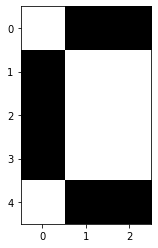

In [ ]:
plt.imshow(small_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.show()

In [ ]:
X_train = np.concatenate([A.reshape(1,63), B.reshape(1,63), C.reshape(1,63)], axis=0)
y_train = np.concatenate([small_A.reshape(1,15), small_B.reshape(1,15), small_C.reshape(1,15)], axis=0)

In [ ]:
class AdaLineNetwork() :
    
    def __init__(self, in_features, out_features, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        self.init_wad()
        
    # Initialize Weights with 0
    def init_wad(self) :
        self.weights = np.zeros(shape=(in_features*out_features,)).reshape(-1,out_features)
    
    #Activation Function
    def h(self,num) :
        if num >= 0 :
            return 1
        else :
            return -1
    def forward(self, x):
        net = np.matmul(x,self.weights)
        prediction = pd.Series(net)
        prediction = prediction.apply(self.h).values
        return prediction
    
    def backward(self,x,y) :
        new_weight = np.matmul(x.reshape(-1,1),y.reshape(1,-1))
        self.weights = self.weights + new_weight
        
    def train(self,X_train,y_train,epochs = 1) :
        error_per_epoch = []
        for epoch in range(0,epochs):
            
            for i in range(len(X_train)) :
              # Backpropagation
              self.backward(X_train[i],y_train[i])
                


# Part 1

In [ ]:
in_features = 63
out_features = 15
model = AdaLineNetwork(in_features, out_features)

In [ ]:
model.train(X_train,y_train, epochs = 1)

In [ ]:
predicted_A = model.forward(X_train[0])
predicted_B = model.forward(X_train[1])
predicted_C = model.forward(X_train[2])

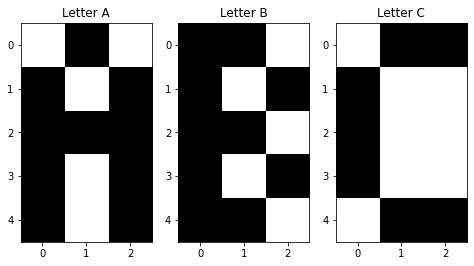

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

# Part 2
The smallest dimension we can reduce to is 3x3.

In [ ]:
smallest_A = np.array([
    -1,1,-1,
    1,1,1,
    1,-1,1,
]).reshape(3,3)

smallest_B = np.array([
    1,1,-1,
    1,1,1,
    1,1,1,
]).reshape(3,3)

smallest_C = np.array([
    1,1,1,
    1,-1,-1,
    1,1,1,
]).reshape(3,3)

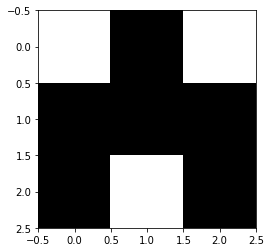

In [ ]:
plt.imshow(smallest_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.show()

In [ ]:
y_train2 = np.concatenate([smallest_A.reshape(1,9), smallest_B.reshape(1,9), smallest_C.reshape(1,9)], axis=0)

In [ ]:
in_features = 63
out_features = 9
model2 = AdaLineNetwork(in_features, out_features)

In [ ]:
model2.train(X_train,y_train2, epochs = 1)

In [ ]:
predicted_A = model2.forward(X_train[0])
predicted_B = model2.forward(X_train[1])
predicted_C = model2.forward(X_train[2])

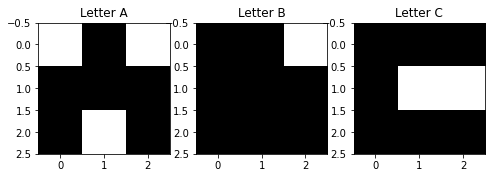

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

# Part 3

In [ ]:
import math
def noise_producer(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      if with_noise.flat[random_pixel] == -1 :
        with_noise.flat[random_pixel] = 1
      else:
        with_noise.flat[random_pixel] = -1
    
    return with_noise

In [ ]:
A_noise_10 = noise_producer(A,0.1)
B_noise_10 = noise_producer(B,0.1)
C_noise_10 = noise_producer(C,0.1)

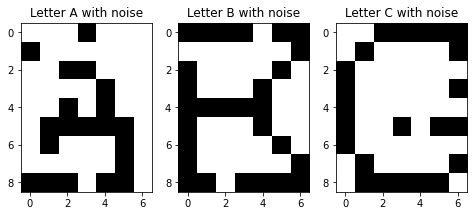

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(A_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter A with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(B_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter B with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(C_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter C with noise')
plt.show()

In [ ]:
A_noise_40 = noise_producer(A,0.4)
B_noise_40 = noise_producer(B,0.4)
C_noise_40 = noise_producer(C,0.4)

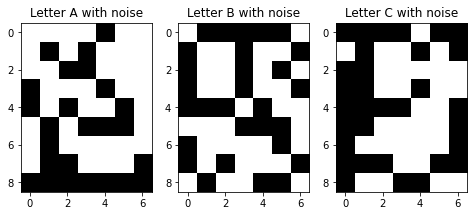

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(A_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter A with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(B_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter B with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(C_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter C with noise')
plt.show()

## Adding 10% noise to input of part 1's model
The accuracy of part 1's model with 10% noise applied is 100%.

In [ ]:
predicted_A = model.forward(A_noise_10)
predicted_B = model.forward(B_noise_10)
predicted_C = model.forward(C_noise_10)

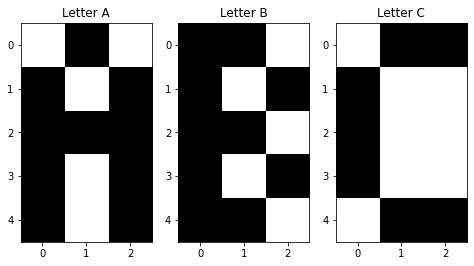

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 40% noise to input of part 1's model
The accuracy of part 1's model with 40% noise applied is 66%.

In [ ]:
predicted_A = model.forward(A_noise_40)
predicted_B = model.forward(B_noise_40)
predicted_C = model.forward(C_noise_40)

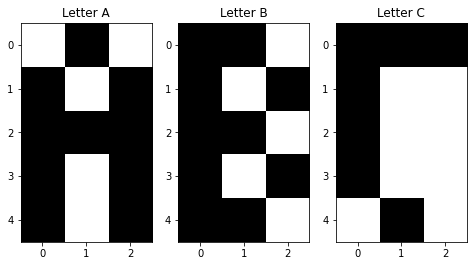

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 10% noise to input of part 2's model
The accuracy of part 2's model with 10% noise applied is 100%.

In [ ]:
predicted_A = model2.forward(A_noise_10)
predicted_B = model2.forward(B_noise_10)
predicted_C = model2.forward(C_noise_10)

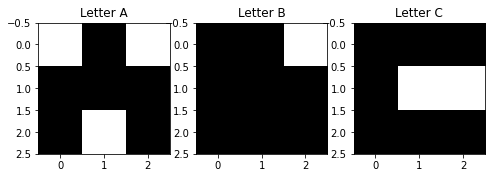

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 40% noise to input of part 2's model
The accuracy of part 2's model with 40% noise applied is 100%.

In [ ]:
predicted_A = model2.forward(A_noise_40)
predicted_B = model2.forward(B_noise_40)
predicted_C = model2.forward(C_noise_40)

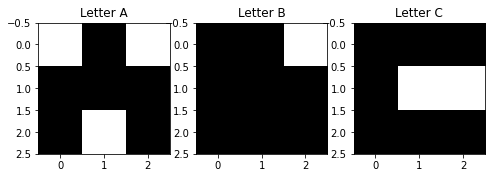

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

# Part 4

In [ ]:
import math
def noise_producer2(arr,percentage):
    pixels = int(np.prod(arr.shape)*percentage)
    with_noise = np.copy(arr)
    for pixel in range(pixels) :
      random_pixel = np.random.choice(np.prod(with_noise.shape), 1)
      with_noise.flat[random_pixel] = 0
    return with_noise

In [ ]:
A_noise_10 = noise_producer2(A,0.1)
B_noise_10 = noise_producer2(B,0.1)
C_noise_10 = noise_producer2(C,0.1)

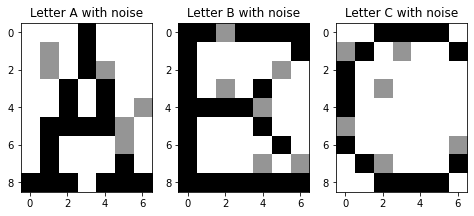

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(A_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter A with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(B_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter B with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(C_noise_10.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter C with noise')
plt.show()

In [ ]:
A_noise_40 = noise_producer2(A,0.4)
B_noise_40 = noise_producer2(B,0.4)
C_noise_40 = noise_producer2(C,0.4)

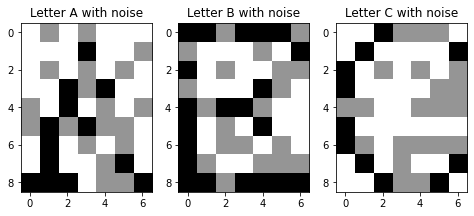

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(A_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter A with noise')
fig.add_subplot(1, 3, 2)
plt.imshow(B_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter B with noise')
fig.add_subplot(1, 3, 3)
plt.imshow(C_noise_40.reshape((9, 7)), interpolation='nearest',cmap='Greys')
plt.title('Letter C with noise')
plt.show()

## Adding 10% noise to input of part 1's model
The accuracy of part 1's model with 10% noise applied is 100%.

In [ ]:
predicted_A = model.forward(A_noise_10)
predicted_B = model.forward(B_noise_10)
predicted_C = model.forward(C_noise_10)

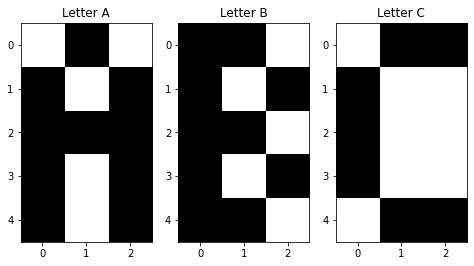

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 40% noise to input of part 1's model
The accuracy of part 1's model with 40% noise applied is 100%.

In [ ]:
predicted_A = model.forward(A_noise_40)
predicted_B = model.forward(B_noise_40)
predicted_C = model.forward(C_noise_40)

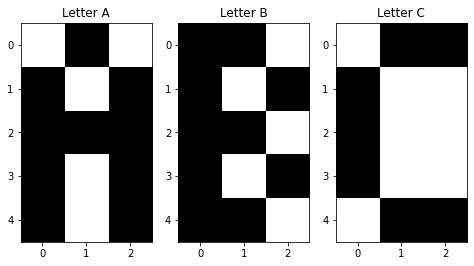

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((5, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 10% noise to input of part 2's model
The accuracy of part 2's model with 10% noise applied is 100%.

In [ ]:
predicted_A = model2.forward(A_noise_10)
predicted_B = model2.forward(B_noise_10)
predicted_C = model2.forward(C_noise_10)

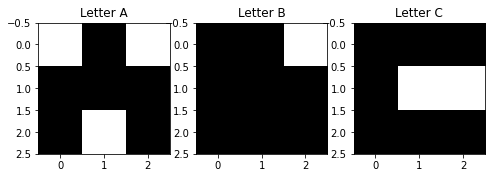

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()

## Adding 40% noise to input of part 2's model
The accuracy of part 2's model with 40% noise applied is 100%.

In [ ]:
predicted_A = model2.forward(A_noise_40)
predicted_B = model2.forward(B_noise_40)
predicted_C = model2.forward(C_noise_40)

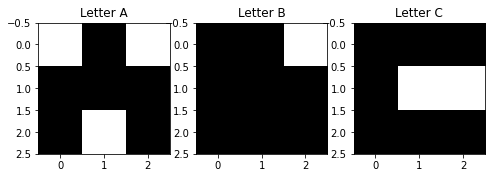

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(predicted_A.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter A')
fig.add_subplot(1, 3, 2)
plt.imshow(predicted_B.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter B')
fig.add_subplot(1, 3, 3)
plt.imshow(predicted_C.reshape((3, 3)), interpolation='nearest',cmap='Greys')
plt.title('Letter C')
plt.show()